<a href="https://colab.research.google.com/github/sayan112207/Keyword-Clustering/blob/main/Keyword_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
data = {
    "Keyword": [
        "scheme definition", "schemes definition", "how to change schemas in snowflake",
        "relational schema", "star database schema", "star schema vs snowflake schema",
        "star vs snowflake schema", "define a map of custom schema data type golang",
        "definition of scheme", "star scheme sql", "using type-graphql with other schemas",
        "snowflake vs star schema", "mongoose schema character type",
        "schema for service type busniess - i.e. marketing consultant",
        "schema markup for consultant type servcie", "definition of schema",
        "snowflake schema vs star schema", "star schema vs snowflake",
        "relational database schema", "star schema data model",
        "types of schemas", "types of schemes", "what is star schema",
        "employee share scheme definition", "network marketing scheme",
        "relational database schema diagram", "relational schema diagram",
        "relational schema example", "snowflake information schema", "star and snowflake schema",
        "star schema and snowflake schema", "schema in dbms definition", "star schema example",
        "hgtv stars real estate scheme", "relational database schema example", "schema diagram definition",
        "schema types", "definition schemes", "er diagram to relational schema",
        "erd to relational schema", "relation schema", "relational data schema",
        "relational schemas", "schema definition in education", "definition for scheme",
        "definition of a scheme", "definition of loyalty schemes", "definition of schema in database",
        "difference between star and snowflake schema", "difference between star schema and snowflake schema",
        "dwh star schema", "example star schema", "information schema snowflake", "loyalty schemes definition",
        "mongoose schema types", "sample star schema", "star schema with example", "types of schema",
        "what is snowflake schema", "what is the star schema", "cognitive schema definition",
        "data warehouse star schema", "database relational schema example", "definition of schema in education",
        "definition of self schema", "relational schema.", "schema definition education",
        "schema education definition", "schemas and networks explain how information is organized in memory.",
        "snowflake infer schema", "snowflake schema example", "star schema for data warehouse",
        "types of schema markup", "what is a star schema", "what is relational schema", "xml schema data types",
        "xml schema types", "court packing scheme definition us history", "data types in xml schema",
        "database relational schema", "defined benefit scheme definition", "definition of cognitive schema",
        "definition of database schema", "definition of rhythm scheme", "example of snowflake schema",
        "infer_schema snowflake", "mongoose schema data types", "relation schemas", "snowflake clone schema",
        "snowflake information_schema", "snowflake schema change", "star schema data warehouse",
        "star schema database", "star schema in data warehouse", "state earnings related pension scheme",
        "state earnings related pension scheme serps", "type of scheme", "types of database schema",
        "types of loyalty schemes", "types of schema in database", "types of schema in dbms",
        "what is a relational schema in database", "what is relational database schema", "xsd schema data types",
        "xsd schema definition", "avro schema data types", "avro schema types", "can not infer schema for type class 'str'",
        "entity relationship diagram to relational schema", "relational schema diagram tool", "rhythm scheme definition",
        "schema change snowflake", "schema types in dbms", "shopify schema types", "snowflake grant select on all tables in schema",
        "star schema examples", "star schema warehouse", "what is a relational schema", "database schema types",
        "definition scheme", "difference between snowflake and star schema", "fdr's court packing scheme definition",
        "how are self-fulfilling prophecies and schemas related", "relation schema definition", "relation schema examples",
        "sanity schema types", "snowflake show schemas in database", "star snowflake and galaxy schema",
        "types of fraudulent schemes", "types of money laundering schemes", "types of offensive schemes in football",
        "what is schema as it relates to seo", "clone schema snowflake", "convert er diagram to relational schema",
        "data modeling star schema", "data vault vs star schema", "data warehouse schema types", "different types of schemas",
        "different types of schemes", "er diagram to relational schema converter", "erd relational schema",
        "flat rate scheme", "grant usage on all schemas in database snowflake", "grant usage on schema snowflake",
        "infer schema snowflake", "information_schema snowflake", "kimball star schema", "multiple fact tables in star schema",
        "nascar all star paint schemes", "nascar all star race paint schemes", "pension scheme types", "prisma schema types",
        "quickbooks flat rate scheme", "relational schema vs er diagram", "schema markup types", "schema therapy types",
        "scheme definition poetry", "snowflake and star schema", "snowflake grant usage on schema",
        "snowflake infer_schema", "snowflake move table to another schema", "snowflake schema and star schema",
        "star schema data modeling", "star schema diagram", "star schema vs normalized",
        "star schema vs snowflake schema example", "star schema with multiple fact tables", "statutory scheme definition",
        "type of schema", "types of pension schemes", "vat flat rate scheme", "what is a snowflake schema",
        "what is star schema and snowflake schema", "what is the definition of scheme", "what's the definition of scheme"
    ],
    "Volume": [9900, 2400, 1900, 1600, 1600, 1300, 1300, 1000, 1000, 1000, 1000, 880, 720, 720, 720, 590, 590, 480, 390,
               320, 320, 320, 320, 260, 260, 260, 260, 260, 260, 260, 210, 210, 170, 170, 170, 170, 140, 140, 140, 140,
               140, 140, 140, 140, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 90, 90, 90, 90, 90, 90,
               90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
               70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
               50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
               40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
               30, 30, 30, 30, 30, 30, 30, 30, 30]
}

In [ ]:
print(len(data['Keyword']))
print(len(data['Volume']))

175
175


In [ ]:
df = pd.DataFrame(data)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Keyword'])

In [ ]:
agglo_clustering = AgglomerativeClustering(
    n_clusters=None,
    metric='cosine',
    linkage='average',
    distance_threshold=0.8
)
labels = agglo_clustering.fit_predict(X.toarray())

In [ ]:
df['Cluster'] = labels

In [ ]:
print(df)

                                      Keyword  Volume  Cluster  \
0                           scheme definition    9900        3   
1                          schemes definition    2400       10   
2          how to change schemas in snowflake    1900        1   
3                           relational schema    1600        4   
4                        star database schema    1600        6   
..                                        ...     ...      ...   
170                      vat flat rate scheme      30        7   
171                what is a snowflake schema      30       13   
172  what is star schema and snowflake schema      30       13   
173          what is the definition of scheme      30       13   
174           what's the definition of scheme      30       13   

                 Cluster_Representative  
0                     scheme definition  
1                    schemes definition  
2    how to change schemas in snowflake  
3                     relational schema

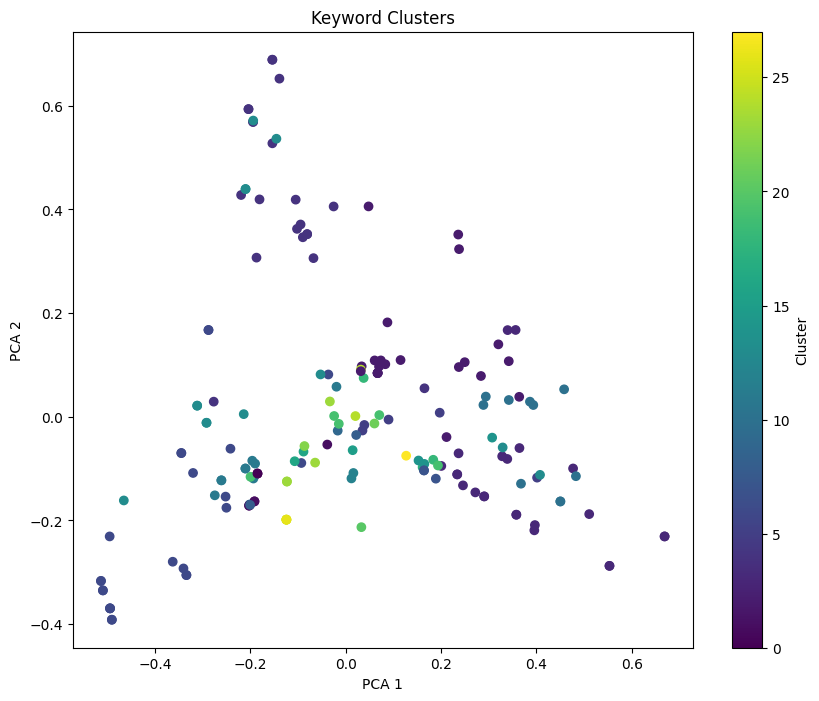

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Keyword Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Check the keywords in each cluster
for cluster_num in df['Cluster'].unique():
    print(f"Cluster {cluster_num}:")
    cluster_keywords = df[df['Cluster'] == cluster_num]['Keyword']
    print(cluster_keywords.tolist())
    print("\n")

Cluster 3:
['scheme definition', 'definition of scheme', 'definition of schema', 'employee share scheme definition', 'schema definition in education', 'definition for scheme', 'definition of a scheme', 'definition of schema in database', 'cognitive schema definition', 'definition of schema in education', 'definition of self schema', 'schema definition education', 'schema education definition', 'court packing scheme definition us history', 'defined benefit scheme definition', 'definition of cognitive schema', 'definition of database schema', 'definition of rhythm scheme', 'rhythm scheme definition', 'definition scheme', "fdr's court packing scheme definition", 'scheme definition poetry', 'statutory scheme definition']


Cluster 10:
['schemes definition', 'types of schemes', 'definition schemes', 'definition of loyalty schemes', 'loyalty schemes definition', 'types of loyalty schemes', 'types of fraudulent schemes', 'types of money laundering schemes', 'types of offensive schemes in foot

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

# Step 1: Extract the TF-IDF vectors for each cluster
cluster_centroids = {}
for cluster_num in df['Cluster'].unique():
    cluster_keywords = df[df['Cluster'] == cluster_num]['Keyword'].tolist()
    cluster_vectors = X[df['Cluster'] == cluster_num].toarray()

    centroid = np.mean(cluster_vectors, axis=0)
    cluster_centroids[cluster_num] = centroid

cluster_representatives = {}
for cluster_num, centroid in cluster_centroids.items():
    cluster_vectors = X[df['Cluster'] == cluster_num].toarray()
    distances = cosine_distances([centroid], cluster_vectors)

    closest_idx = np.argmin(distances)

    representative_keyword = df[df['Cluster'] == cluster_num].iloc[closest_idx]['Keyword']

    cluster_representatives[cluster_num] = representative_keyword


df['Cluster_Representative'] = df['Cluster'].map(cluster_representatives)

# Print the DataFrame with the mapped clusters
print(df[['Keyword', 'Cluster', 'Cluster_Representative']])

                                      Keyword  Cluster  \
0                           scheme definition        3   
1                          schemes definition       10   
2          how to change schemas in snowflake        1   
3                           relational schema        4   
4                        star database schema        6   
..                                        ...      ...   
170                      vat flat rate scheme        7   
171                what is a snowflake schema       13   
172  what is star schema and snowflake schema       13   
173          what is the definition of scheme       13   
174           what's the definition of scheme       13   

                      Cluster_Representative  
0                       definition of scheme  
1                           types of schemes  
2                    snowflake schema change  
3                  relational schema diagram  
4    star schema vs snowflake schema example  
..                   

In [ ]:
df.head()

,Keyword,Volume,Cluster,Cluster_Representative
0,scheme definition,9900,3,definition of scheme
1,schemes definition,2400,10,types of schemes
2,how to change schemas in snowflake,1900,1,snowflake schema change
3,relational schema,1600,4,relational schema diagram
4,star database schema,1600,6,star schema vs snowflake schema example


In [ ]:
# Group the DataFrame by the 'Cluster' column
grouped = df.groupby('Cluster')

cluster_dfs = {}

for cluster_num, cluster_df in grouped:
    cluster_dfs[cluster_num] = cluster_df

In [ ]:
for cluster_num, cluster_df in cluster_dfs.items():
    print(f"\nCluster {cluster_num} DataFrame:")
    print(cluster_df)


Cluster 0 DataFrame:
                 Keyword  Volume  Cluster Cluster_Representative
50       dwh star schema     110        0        dwh star schema
55    sample star schema     110        0        dwh star schema
146  kimball star schema      40        0        dwh star schema

Cluster 1 DataFrame:
                                Keyword  Volume  Cluster  \
2    how to change schemas in snowflake    1900        1   
88               snowflake clone schema      70        1   
90              snowflake schema change      70        1   
111             schema change snowflake      50        1   
132              clone schema snowflake      40        1   

      Cluster_Representative  
2    snowflake schema change  
88   snowflake schema change  
90   snowflake schema change  
111  snowflake schema change  
132  snowflake schema change  

Cluster 2 DataFrame:
                         Keyword  Volume  Cluster Cluster_Representative
20              types of schemas     320        2     

In [ ]:
# Optionally, save each cluster DataFrame to a separate Excel sheet
with pd.ExcelWriter("/content/schema_kw_cluster.xlsx") as writer:
    for cluster_num, cluster_df in cluster_dfs.items():
        cluster_df.to_excel(writer, sheet_name=f"Cluster_{cluster_num}", index=False)

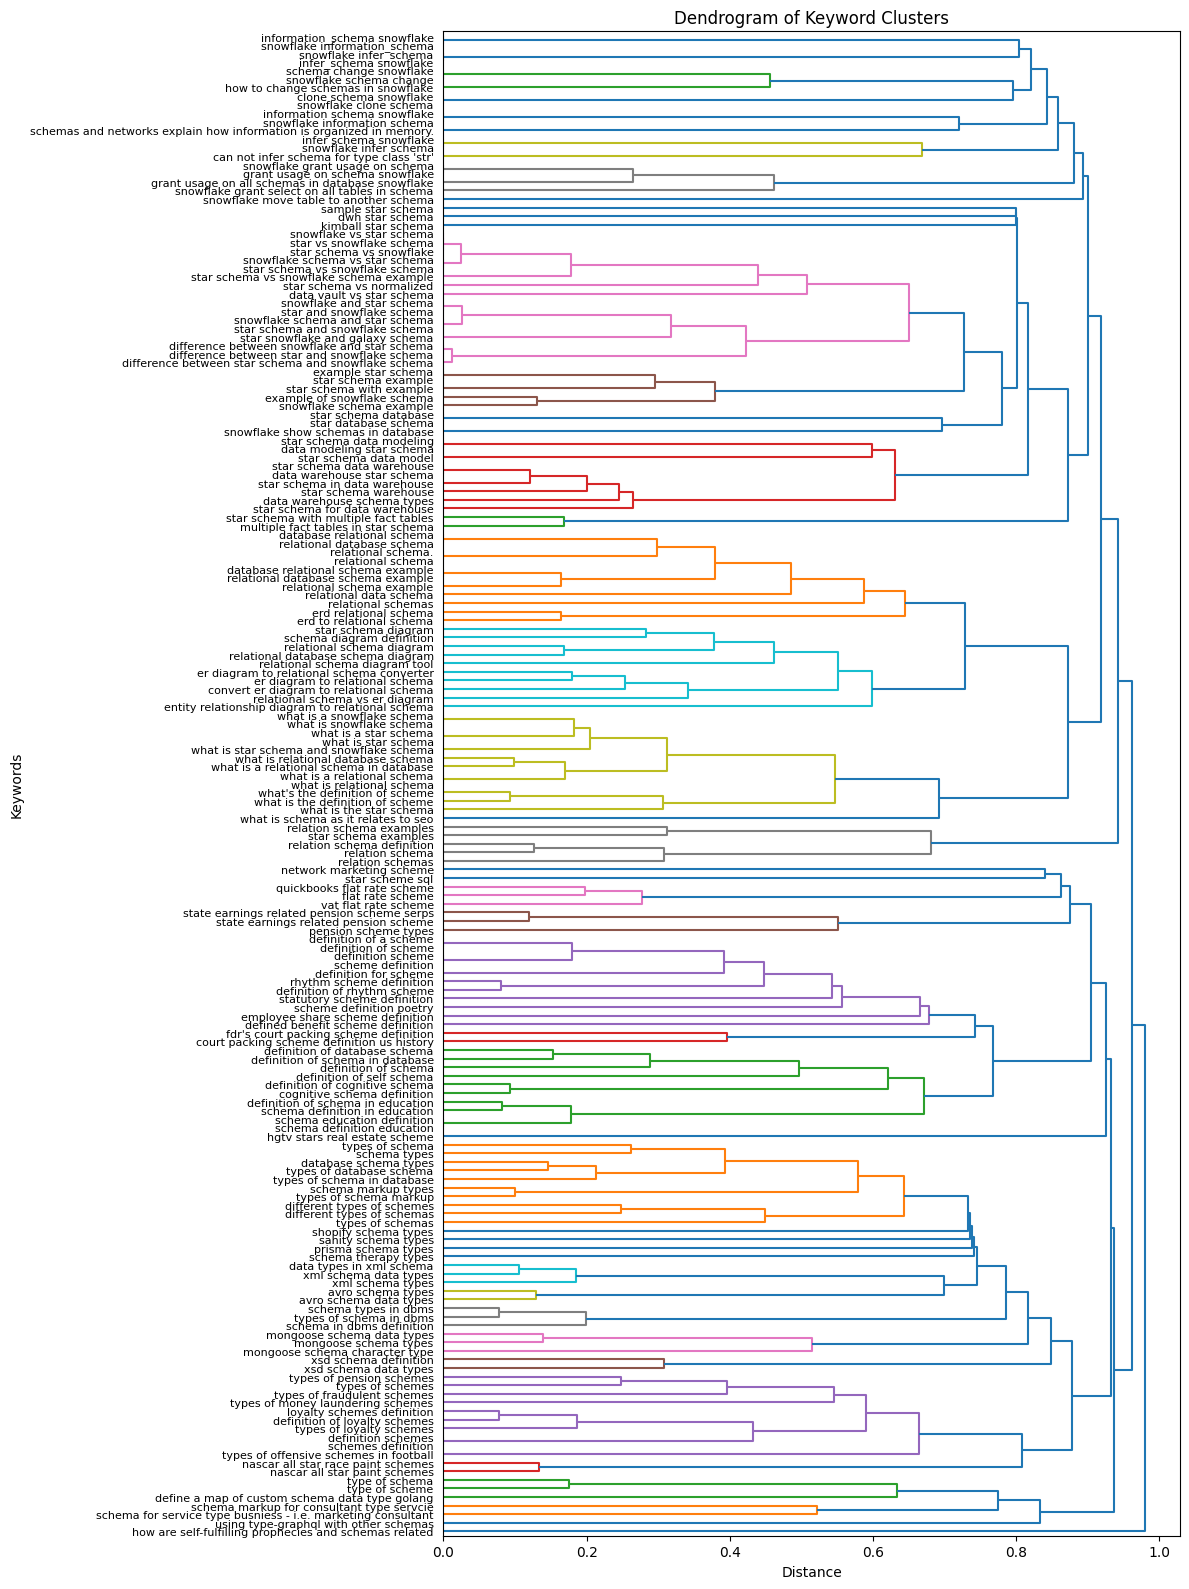

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Calculate linkage matrix
linkage_matrix = sch.linkage(X.toarray(), method='average', metric='cosine')

# Plot the dendrogram
plt.figure(figsize=(12, 16))
dendrogram(linkage_matrix, labels=df['Keyword'].tolist(), orientation='right', leaf_font_size=8)  # Customize labels and font size
plt.title('Dendrogram of Keyword Clusters')
plt.xlabel('Distance')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

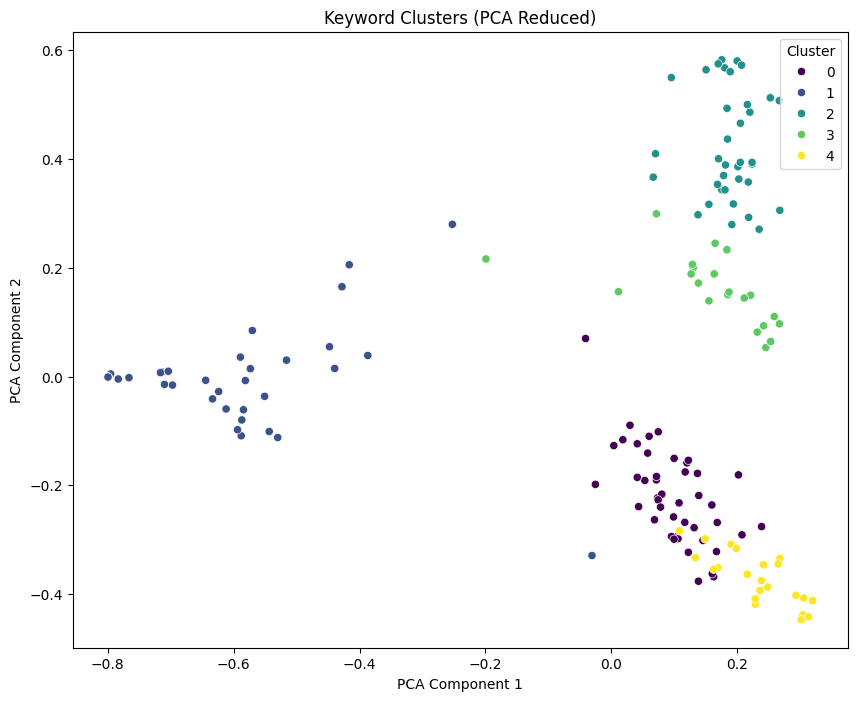

<ipython-input-8-2d5e3f19554f>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['search_intent'], palette='cool')


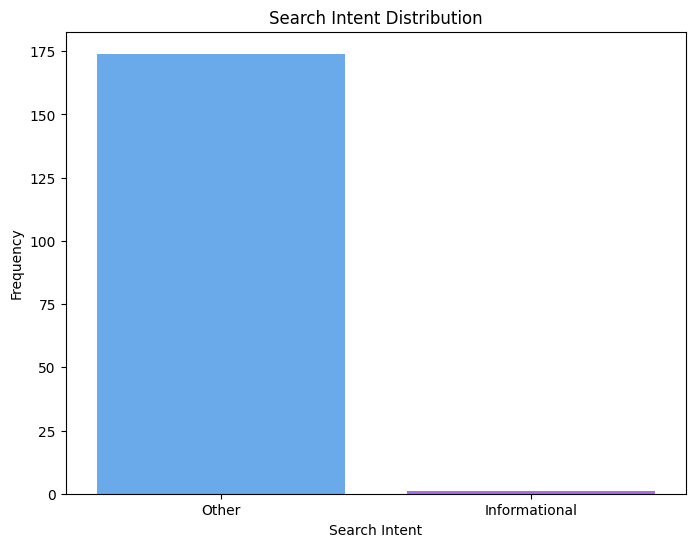

In [ ]:
# Required libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.DataFrame(data) # Convert the dictionary to a DataFrame

keywords = data['Keyword']

# Preprocessing function
def preprocess(text):
    import re
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Convert keywords list to a Pandas Series
keywords = pd.Series(keywords)

# Preprocess the keywords
keywords_cleaned = keywords.apply(preprocess)

# Embed the keywords
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight embedding model
embeddings = model.encode(keywords_cleaned.tolist())

# Classify search intent
def classify_intent(keyword):
    if any(word in keyword for word in ['buy', 'purchase', 'order', 'discount', 'price']):
        return 'Transactional'
    elif any(word in keyword for word in ['how', 'what', 'why', 'guide', 'tutorial', 'best']):
        return 'Informational'
    elif any(word in keyword for word in ['site', 'website', 'login', 'address']):
        return 'Navigational'
    else:
        return 'Other'

data['search_intent'] = keywords_cleaned.apply(classify_intent)

# Cluster the keywords
n_clusters = 5  # Define the number of clusters
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = clustering_model.fit_predict(embeddings)
data['cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Keyword Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Visualize intent distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=data['search_intent'], palette='cool')
plt.title('Search Intent Distribution')
plt.xlabel('Search Intent')
plt.ylabel('Frequency')
plt.show()

# Save results
data.to_csv('clustered_keywords.csv', index=False)